<a href="https://colab.research.google.com/github/goulartsursula/iniciacao-cientifica/blob/master/notebooks/normfit_and_transverse_momentum%2Bpseudorapidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is needed to create the fit
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

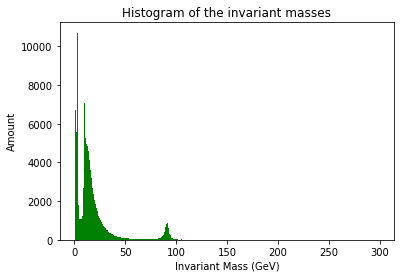

In [2]:
# Let's choose Dimuon_DoubleMu.csv 
data = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

# And save the invariant masses to iMass
iMass = data['M']

# Plus draw the histogram
n, bins, patches = plt.hist(iMass, 300, facecolor='g')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Amount')
plt.title('Histogram of the invariant masses')

plt.show()

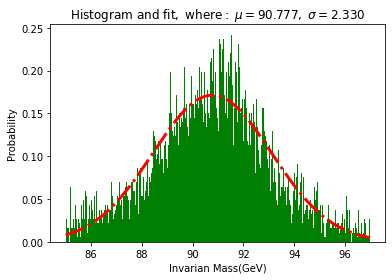

In [14]:
min = 85
max = 97

# Let's crop the area. croMass now includes all the masses between the values of min and max
croMass = iMass[(min < iMass) & (iMass < max)]

# Calculate the mean (µ) and standard deviation (sigma) of normal distribution using norm.fit-function from scipy
(mu, sigma) = norm.fit(croMass)

# Histogram of the cropped data. Note that the data is normalized (density = 1)
n, bins, patches = plt.hist(croMass, 300, density = 1, facecolor='g')

#mlab.normpdf calculates the normal distribution's y-value with given µ and sigma
# let's also draw the distribution to the same image with histogram
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-.', linewidth=3)


plt.xlabel('Invarian Mass(GeV)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram \ and\ fit,\ where:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()


*   Transeverse momentum $p_t$ means the momentum, which is perpendicular to the beam.
  * It can be calculated from the momenta to the x and y directions using vector analysis, but (in most datasets from CMS at least) can be found directly from the loaded data.

*   Pseudorapidity tells the angle between the particle and the beam **(perguntar)**
  * Pseudorapidity is the column Eta $(\eta)$ in the loaded data.

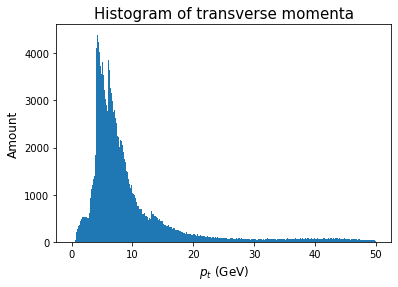

In [15]:
# allPt now includes all the transverse momenta
allPt = pd.concat([data.pt1, data.pt2]) 

# concat-command from the pandas module combines (concatenates) the information to a single column
# (it returns here a DataFrame -type variable, but it only has a singe unnamed column, so later
# we don't have to choose the wanted column from the allPt variable)


# And the histogram
plt.hist(allPt, bins=400, range = (0,50))
plt.xlabel('$p_t$ (GeV)', fontsize = 12)
plt.ylabel('Amount', fontsize = 12)
plt.title('Histogram of transverse momenta', fontsize = 15)

plt.show()

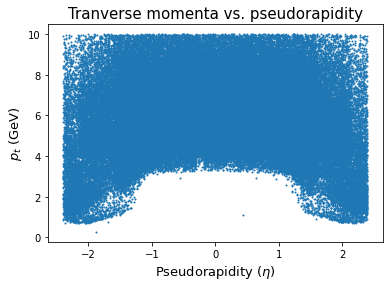

In [17]:
# using the below cond, we only choose the events below that amount (pt < cond)
cond = 10

smallPt = data[(data.pt1 < cond) & (data.pt2 < cond)]

# Let's save all the etas and pts to variables
allpPt = pd.concat([smallPt.pt1, smallPt.pt2])
allEta = pd.concat([smallPt.eta1, smallPt.eta2])


# and draw a scatterplot

plt.scatter(allEta, allpPt, s=1)

plt.ylabel('$p_t$ (GeV)', fontsize=13)
plt.xlabel('Pseudorapidity ($\eta$)', fontsize=13)
plt.title('Tranverse momenta vs. pseudorapidity', fontsize=15)

plt.show()


Image on the left tells you the relation between pseudorapidity ($\eta$) and the angle ($\theta$). If $\eta = 0$, then the event is perpendicular to the beam and so on.

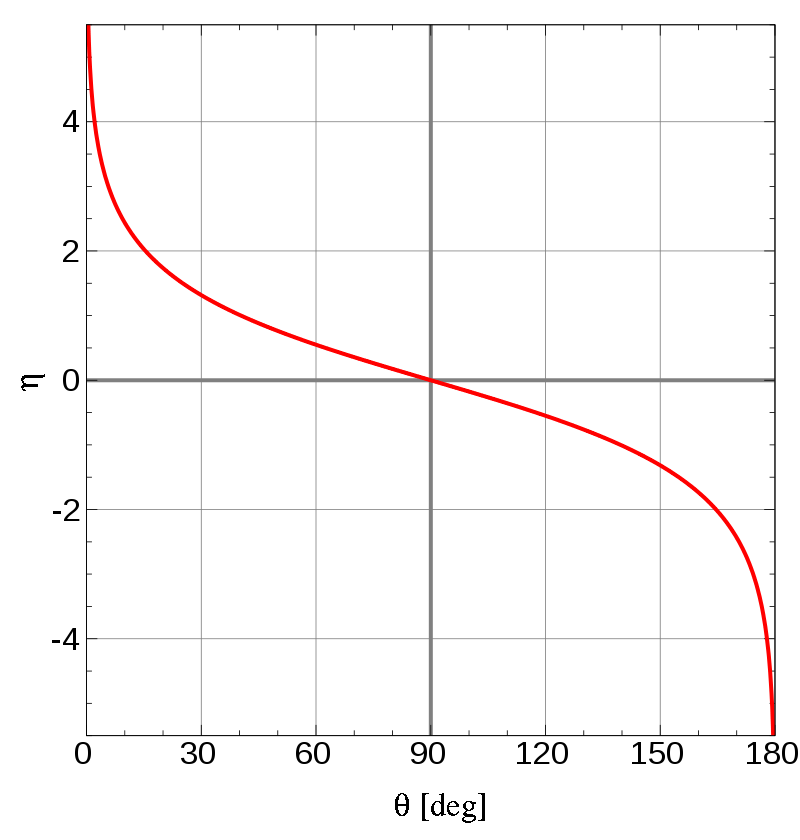